# **Tugas UTS**

Nama : Bihubbil Choir Aidifta<p>
NIM : 190411100121

> Soal


1.   Lakukan analisa clustering dengan menggunakan k-mean clustering pada data twitter denga kunci pencarian " tragedi kanjuruhan"
2.   Lakukan peringkasan dokumen dari berita online ( link berita bebas) menggunakan metode pagerank



## Web Mining

Web Mining adalah proses teknik Data Mining untuk secara otomatis menemukan dan mengekstrak informasi dari suatu halaman Web. Tujuan utama penambangan web adalah menemukan informasi yang berguna.

Penambangan web membantu meningkatkan kekuatan mesin pencari web dengan mengklasifikasikan dokumen web dan mengidentifikasi halaman web.


---

# **Tugas analisa clustering dengan menggunakan k-mean clustering pada data twitter denga kunci pencarian " tragedi kanjuruhan"**

## Twitter
Twitter adalah situs berita dan jejaring sosial online tempat orang berkomunikasi dalam pesan singkat yang disebut tweet. Tweeting adalah memposting pesan singkat untuk siapa saja yang mengikuti kita di Twitter, dengan harapan kata-kata kita dapat bermanfaat dan menarik bagi orang lain.

---

## **Instalasi Library**
Pada tahap ini dilakukan instalasi library-library yang nantinya dibutuhkan untuk menjalankan program, berikut adalah library yang dibutuhkan : 

---



> ##  Snscrape
Snscrape merupakan perpustakaan / library sumber terbuka (open source) yang ditulis dengan bahasa pemrograman python dan berguna untuk melakukan scraping atau ekstraksi dari jejaring sosial. Pada program ini kita akan menggunakan Snscrape untuk mengambil/mengekstrak data Tweets dari Twitter.

> ## Pandas
Pandas merupakan perpustakaan / library sumber terbuka (Open Source) yang ditulis dengan bahasa pemrograman python dan berguna untuk melakukan analisis dan manipulasi data, khususnya untuk memanipulasi tabel numerik dan deret waktu.
Pada program ini kita akan memanfaatkan Pandas DataFrame untuk menempatkan data hasil crawling.

> ## Sastrawi
Sastrawi merupakan perpustakaan / library sumber terbuka yang ditulis dengan bahasa pemrograman python dan berguna untuk melakukan pengurangan kata-kata yang ter- infleksi dalam bahasa Indonesia ke bentuk baku-nya atau sesuai dengan standar kamus.

> ## Scikit-learn
Scikit-learn adalah library machine learning open source  untuk bahasa pemrograman Python. Ini fitur berbagai klasifikasi, regresi, algoritma pengelompokan, dan alat yang efisien untuk data mining dan analisis data. Ini dibangun di atas NumPy, SciPy, dan Matplotlib.

> ## Yellowbrick
Yellowbrick adalah seperangkat alat diagnostik visual yang disebut "Visualizers" yang memperluas scikit-learn API untuk memungkinkan kemudi manusia dalam proses pemilihan model. Singkatnya, Yellowbrick menggabungkan scikit-learn dengan matplotlib dalam tradisi terbaik dari dokumentasi scikit-learn, tetapi untuk menghasilkan visualisasi untuk alur kerja pembelajaran mesin Anda !


In [ ]:
%%capture
!pip install snscrape
!pip install pandas
!pip install Sastrawi
!pip install scikit-learn
!pip install yellowbrick

## **Menulis Script Konfigurasi Snscrape**
Pada tahap ini akan dibuat script kofigurasi Snscrape, script ini sendiri berupa modul yang berisi fungsi-fungsi untuk melakukan crawling dan scraping data tweet yang berada pada Twitter.<p>
Berikut adalah penjelasan singkat mengenai script tersebut.

---
<br>

```
search_query = "tragedi kanjuruhan"
jumlah_tweets = 100
tweets = []
```

Variable tersebut merupakan variable yang berguna untuk mendefinisikan "search query" yang akan digunakan untuk mencari topik spesifik di twitter, "jumlah tweet" yang nantinya akan diambil, serta sebuah wadah berupa "list" yang nantinya akan digunakan untuk menyimpan data hasil scrape.

---

<br>

```
for tweet in sntwitter.TwitterSearchScraper(search_query).get_items():
    
    if len(tweets) == jumlah_tweets:
        break
    else:
        tweets.append([tweet.date, tweet.username, tweet.content, 'None'])
```

Loop ini berfungsi untuk mengambil tiap data tweet yang berhasil diambil dari twitter berdasarkan query yang telah kita definisikan sebelumnya. Pada loop tersebut terdapat pengecekan kondisi yang akan mengecek jumlah tweet yang berhasil diambil, selama loop ini belum mencapai batas jumlah tweet yang kita tentukan sebelumnya, maka loop ini akan terus melakukan penambahan data tweet ke wadah(list) yang telah dibuat sebelumnya.


---

<br>

```
df = pd.DataFrame(tweets, columns=['Date', 'User', 'Tweet', 'Label'])
```
Variable diatas berfungsi untuk mendefinisikan data tweet yang sebelumnya telah ditempatkan di wadah(list), dalam bentuk Pandas Dataframe.





In [ ]:

import snscrape.modules.twitter as sntwitter
import pandas as pd
# from google.colab import data_table
# data_table.enable_dataframe_formatter()

search_query = "tragedi kanjuruhan"
jumlah_tweets = 100
tweets = []


for tweet in sntwitter.TwitterSearchScraper(search_query).get_items():
    
    if len(tweets) == jumlah_tweets:
        break
    else:
        tweets.append([tweet.date, tweet.username, tweet.content, 'None'])
        


## **Import Hasil**
Setelah perintah sebelumnya berhasil dijalankan, selanjutnya kita akan melakukan import isi berkas hasil scrape sebelumnya kedalam Pandas DataFrame.

In [ ]:
import pandas as pd
df = pd.DataFrame(tweets, columns=['Date', 'User', 'Tweet', 'Label'])
df

,Date,User,Tweet,Label
0,2022-10-18 03:47:13+00:00,MegaposNews,Polri Panggil Ketum PSSI Terkait Tragedi Stadi...,None
1,2022-10-18 03:47:03+00:00,aboutmalangcom,Polisi Panggil Ketua Umum PSSI Iwan Bule Untuk...,None
2,2022-10-18 03:46:02+00:00,tauberitamedia,"Ketua PSSI, Mochamad Iriawan disebut akan dipe...",None
3,2022-10-18 03:45:57+00:00,malangpost_com,Polresta Makota Beri Beasiswa dan Jamin Pendid...,None
4,2022-10-18 03:45:32+00:00,arsenalskitchen,[TERBARU]\n\nTragedi Kanjuruhan harus diusut t...,None
...,...,...,...,...
95,2022-10-18 02:14:34+00:00,VIVAcoid,Korban Tragedi Kanjuruhan Dapat Jaminan Layana...,None
96,2022-10-18 02:14:28+00:00,kalimaya_malang,Setelah berkeliling takziah korban Tragedi Kan...,None
97,2022-10-18 02:12:51+00:00,kompasiana,Kesimpulan TGIPF Menjadi Antitesis bagi Pengur...,None
98,2022-10-18 02:10:01+00:00,gNews_channel,"Tragedi Kanjuruhan Malang, Khofifah: Saya Rasa...",None


## **Preprocessing Data Tweets**

### Case Folding
Case folding merupakan tahap text preprocessing yang berguna untuk :


*   Mengubah huruf kapital menjadi huruf kecil
*   Mengapus tanda baca
*   Menghapus angka
*   Menghapus karakter kosong

<br>

Sebelum melakukan case folding diatas, kode ini juga melakukan penghapusan link dan mention yang ada pada data tweet.



In [ ]:
import string

#Mengapus link dan mention
df['Tweet'] = df['Tweet'].replace(r'\s+',' ', regex=True)
indx = 0
for i in df['Tweet']:
  temp = df['Tweet'][indx].split()
  for j in temp:
    if 'http' in j:
      df['Tweet'] = df['Tweet'].replace(r'%s'%j," ", regex=True)
    if '@' in j:
      df['Tweet'] = df['Tweet'].replace(r'%s'%j," ", regex=True)
  indx+=1



#mengubah menjadi huruf kecil
df['Tweet'] = df['Tweet'].str.lower()

#menghapus tanda baca
for char in string.punctuation:
    df['Tweet'] = df['Tweet'].replace(r'[\%s]'%char," ", regex=True)

#menghapus angka
df['Tweet'] = df['Tweet'].replace(r'\d+',' ', regex=True)

#menghapus karakter kosong
df['Tweet'] = df['Tweet'].replace(r'\s+',' ', regex=True)
df['Tweet'][2]



'ketua pssi mochamad iriawan disebut akan diperiksa di mapolda jawa timur jatim pada selasa terkait tragedi kanjuruhan '

### Stopwords Removal
StopWords Removal merupakan tahap prepocessing yang berguna untuk menhapus kata umum yang biasanya muncul dalam jumlah besar dan dianggap tidak memiliki makna. Contoh stopword dalam bahasa Indonesia adalah “yang”, “dan”, “di”, “dari”, dll.


In [ ]:
import urllib.request, json 
with urllib.request.urlopen("https://raw.githubusercontent.com/smilesense/stopwords-id/master/stopwords-id.json") as list_stopwords:
    data_stopword = json.load(list_stopwords)

for i in data_stopword:
    df['Tweet'] = df['Tweet'].replace(r'\b%s\b'%i, '', regex=True)
df['Tweet'] = df['Tweet'].replace(r'\s+',' ', regex=True)

df['Tweet'][2]

'ketua pssi mochamad iriawan diperiksa mapolda jawa timur jatim selasa terkait tragedi kanjuruhan '

### Stemming
Stemming merupakan tahapan dalam preprocessing yang berguna untuk mengubah kata yang memiliki imbuhan menjadi kata dasarnya. Contohnya adalah, misal pada suatu teks terdapat kata "berjalan", maka dengan menerapkan metode stemming, teks tersebut akan diubah menjadi kata "jalan" atau bentuk dasar dari kata "berjalan". 

In [ ]:
# import StemmerFactory class
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()
# stemming process

try:
  ind = 0
  for sentence in df['Tweet']:
      df['Tweet'][ind] = stemmer.stem(str(sentence))
      ind+=1
  raise KeyboardInterrupt
except KeyboardInterrupt:
  print(df['Tweet'][2])
else :
  print(df['Tweet'][2])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


ketua pssi mochamad iriawan periksa mapolda jawa timur jatim selasa kait tragedi kanjuruhan


### Tokenisasi

Tokenizing adalah tahap preprocessing yang berguna untuk memisahkan teks menjadi potongan-potongan yang disebut sebagai token untuk kemudian di analisa. Kata, angka, simbol, tanda baca dan entitas penting lainnya dapat dianggap sebagai token.

In [ ]:
indeks = 0
df2 = df.copy()
for tweet in df2['Tweet']:
    df2['Tweet'][indeks] = str(tweet).split()
    indeks+=1

df2['Tweet'][2]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


['ketua',
 'pssi',
 'mochamad',
 'iriawan',
 'periksa',
 'mapolda',
 'jawa',
 'timur',
 'jatim',
 'selasa',
 'kait',
 'tragedi',
 'kanjuruhan']

### Hasil Preprocessing


In [ ]:
df2

,Date,User,Tweet,Label
0,2022-10-18 03:47:13+00:00,MegaposNews,"[polri, panggil, tum, pssi, kait, tragedi, sta...",None
1,2022-10-18 03:47:03+00:00,aboutmalangcom,"[polisi, panggil, ketua, pssi, iwan, bule, sak...",None
2,2022-10-18 03:46:02+00:00,tauberitamedia,"[ketua, pssi, mochamad, iriawan, periksa, mapo...",None
3,2022-10-18 03:45:57+00:00,malangpost_com,"[polresta, makota, beasiswa, jamin, didik, ana...",None
4,2022-10-18 03:45:32+00:00,arsenalskitchen,"[baru, tragedi, kanjuruhan, usut, tuntas, usut...",None
...,...,...,...,...
95,2022-10-18 02:14:34+00:00,VIVAcoid,"[korban, tragedi, kanjuruhan, jamin, layan, pr...",None
96,2022-10-18 02:14:28+00:00,kalimaya_malang,"[keliling, takziah, korban, tragedi, kanjuruha...",None
97,2022-10-18 02:12:51+00:00,kompasiana,"[simpul, tgipf, antitesis, urus, pssi, tragedi...",None
98,2022-10-18 02:10:01+00:00,gNews_channel,"[tragedi, kanjuruhan, malang, khofifah, komnas...",None


## **Term Frequency (TF)**
Term Frequency merupakan metode yang digunakan untuk mengetahui seberapa sering suatu kata muncul dalam suatu teks. Semakin banyak frekuensi kemunculan dari kata tsb, semakin besar pula nanti nilainya.



### Term Frequency Keseluruhan

In [ ]:
listkata = []
for tweet in df['Tweet']:
    listkata = listkata + str(tweet).split()

listkata_nodup = list(dict.fromkeys(listkata))
hasil_hitung = {}
for test1 in listkata_nodup:
    jumlah = 0
    for test2 in range(len(listkata)):
        if test1 == listkata[test2]:
            jumlah+=1
    hasil_hitung.update({'%s'%test1 : jumlah})
    
hasil_hitung = dict(sorted(hasil_hitung.items(), key=lambda item: item[1], reverse=True))
print(hasil_hitung)

{'tragedi': 102, 'kanjuruhan': 101, 'pssi': 32, 'korban': 32, 'periksa': 27, 'malang': 21, 'kait': 15, 'polisi': 15, 'iwan': 15, 'bule': 14, 'jatim': 13, 'fifa': 13, 'tum': 12, 'ketua': 12, 'indonesia': 11, 'usut': 10, 'sepak': 10, 'bola': 10, 'polda': 10, 'stadion': 9, 'tuntas': 8, 'tragedikanjuruhan': 8, 'jagainstitusipolri': 8, 'donasi': 8, 'saksi': 7, 'iriawan': 7, 'jawa': 7, 'timur': 7, 'temu': 7, 'yg': 7, 'nama': 7, 'bantu': 7, 'perintah': 7, 'polri': 6, 'mochamad': 6, 'komnas': 5, 'ham': 5, 'orang': 5, 'manusia': 5, 'tunda': 5, 'sangka': 5, 'jiwa': 5, 'jalan': 5, 'iwanbule': 5, 'via': 5, 'rumah': 5, 'sanksi': 5, 'presiden': 5, 'm': 5, 'peristiwa': 4, 'aremania': 4, 'mata': 4, 'tinggal': 4, 'tetap': 4, 'enam': 4, 'personel': 4, 'tanding': 4, 'ujung': 4, 'insiden': 4, 'milu': 4, 'lanjut': 4, 'rssa': 4, 'kapolri': 4, 'baik': 4, 'keluarga': 4, 'sepakbola': 4, 'kota': 4, 'rawat': 4, 'tgipf': 4, 'berita': 4, 'jokowi': 4, 'bangkitbersamaet': 4, 'saudara': 4, 'baca': 4, 't': 4, 'panggil

### Term Frequency Tiap Tweet

In [ ]:
def terms(dataframe):
  # pd.options.mode.chained_assignment = None
  # pd.options.display.max_colwidth = None
  # pd.options.display.max_columns = None
  # pd.options.display.max_rows = None

  df3 = dataframe.copy()
  a = 1
  for inter in range(len(df3['Tweet'])):
      for fitur in hasil_hitung:
          df3['%s'%(fitur)] = 0
          a+=1

  for inter in range(len(df3['Tweet'])):
    for fitur in hasil_hitung:
        cek = df3['Tweet'][inter]
        jumlah = 0
        for iter2 in range(len(cek)):
          if fitur == cek[iter2]:
            jumlah+=1
        df3['%s'%fitur][inter] = jumlah
        a+=1
  df3.to_csv(r'my_data.csv', index=False)
  return df3
terms(df2)



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Date,User,Tweet,Label,tragedi,kanjuruhan,pssi,korban,periksa,malang,...,keliling,kedungkandang,klojen,wali,sutiaji,lowokwaru,mbkbfm,antitesis,hipotesis,panas
0,2022-10-18 03:47:13+00:00,MegaposNews,"[polri, panggil, tum, pssi, kait, tragedi, sta...",None,1,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,2022-10-18 03:47:03+00:00,aboutmalangcom,"[polisi, panggil, ketua, pssi, iwan, bule, sak...",None,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2022-10-18 03:46:02+00:00,tauberitamedia,"[ketua, pssi, mochamad, iriawan, periksa, mapo...",None,1,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,2022-10-18 03:45:57+00:00,malangpost_com,"[polresta, makota, beasiswa, jamin, didik, ana...",None,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2022-10-18 03:45:32+00:00,arsenalskitchen,"[baru, tragedi, kanjuruhan, usut, tuntas, usut...",None,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2022-10-18 02:14:34+00:00,VIVAcoid,"[korban, tragedi, kanjuruhan, jamin, layan, pr...",None,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
96,2022-10-18 02:14:28+00:00,kalimaya_malang,"[keliling, takziah, korban, tragedi, kanjuruha...",None,1,1,0,1,0,1,...,1,1,1,1,1,1,1,0,0,0
97,2022-10-18 02:12:51+00:00,kompasiana,"[simpul, tgipf, antitesis, urus, pssi, tragedi...",None,1,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
98,2022-10-18 02:10:01+00:00,gNews_channel,"[tragedi, kanjuruhan, malang, khofifah, komnas...",None,1,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0


## **Clustering sentimen menggunakan metode [KMEANS]**

Clustering, secara umum, adalah metode "belajar tanpa pengawasan". Itu berarti kita tidak memiliki variabel target.

K-means clustering merupakan yang paling umum digunakan untuk mempartisi kumpulan data yang diberikan ke dalam kumpulan k grup (yaitu k cluster ), di mana k mewakili jumlah grup yang ditentukan sebelumnya oleh analis .


### Reduksi dimensi menggunakan metode [Principal Component Analysis(PCA)]

Principal Component Analysis(PCA) merupakan metode yang berfungsi untuk mengubah data berdimensi tinggi menjadi data berdimensi rendah dengan memilih fitur terpenting yang menangkap informasi maksimum tentang kumpulan data. Fitur dipilih berdasarkan varians yang ditimbulkannya dalam output. Fitur yang menyebabkan varians tertinggi adalah komponen utama pertama. Fitur yang bertanggung jawab untuk varian tertinggi kedua dianggap sebagai komponen utama kedua, dan seterusnya.

In [ ]:
from sklearn.decomposition import PCA
df3 = pd.read_csv('my_data.csv')
df_fcluster = df3.drop(labels=['Label', 'User', 'Tweet', 'Date'], axis=1)
# df_fcluster
pca = PCA(n_components=2)
df_fcluster = pca.fit_transform(df_fcluster)
df_fclusters = pd.DataFrame(df_fcluster)
df_fclusters

,0,1
0,0.436573,-0.259077
1,1.143072,-0.071681
2,1.456278,-0.240401
3,-0.550720,-0.290346
4,-0.643598,-0.109061
...,...,...
95,-0.530055,-0.274349
96,-0.819685,-0.648269
97,0.260392,0.026628
98,-0.769436,-0.545146


### Hasil Clustering

In [ ]:
from sklearn.cluster import KMeans

kmeans =KMeans(n_clusters=2)
kmeans=kmeans.fit(df_fcluster)
prediksi=kmeans.predict(df_fcluster)
centroids = kmeans.cluster_centers_

dfprediksi = pd.DataFrame(prediksi, columns=["Cluster"])
# dfcentroids = pd.DataFrame(centroids)
# hasil = dfcentroids.merge(dfprediksi,left_index=True, right_on='Cluster')
# pd.options.display.max_rows = None
dfprediksi


,Cluster
0,1
1,1
2,1
3,0
4,0
...,...
95,0
96,0
97,0
98,0


[0 1]


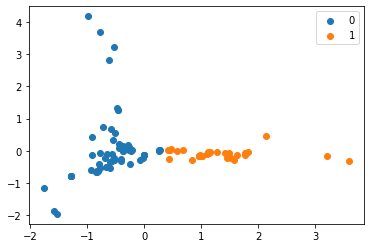

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
#Mendapatkan label unik
label = prediksi
u_labels = np.unique(label)
print(u_labels)
 
#menampilkan hasil dalam bentuk grafik:
 
for i in u_labels:
    plt.scatter(df_fcluster[label == i , 0] , df_fcluster[label == i , 1] , label = i)
plt.legend()
plt.show()

## **Menentukan jumlah cluster (k) optimal pada metode KMEANS menggunakan metode Elbow**

Langkah mendasar untuk setiap algoritma unsupervised adalah menentukan jumlah cluster yang optimal di mana data dapat dikelompokkan. Metode Elbow adalah salah satu metode yang paling populer untuk menentukan nilai k yang optimal.

metode Elbow memilih jumlah cluster yang optimal dengan menyesuaikan model dengan rentang nilai. Jika bagan garis menyerupai lengan, maka "siku" (titik belok pada kurva) merupakan indikasi yang baik bahwa model yang mendasari paling cocok pada titik itu.

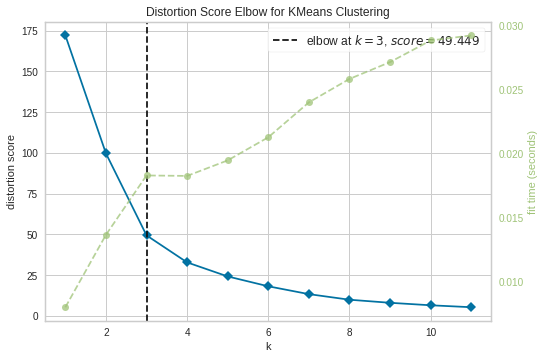

In [ ]:
from yellowbrick.cluster import KElbowVisualizer


# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12))

visualizer.fit(df_fcluster)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

### Optimal cluster
Dapat terlihat pada gambar / grafik diatas, dari 12 (1 - 12) jumlah cluster yang kita coba bandingkan, cluster / k = 3 memiliki lengkungan yang paling tajam, maka jumlah cluster tersebutlah yang merupakan jumlah cluster optimal.

In [ ]:
optimal = visualizer.elbow_value_
print("Optimal Cluster = ", optimal)

Optimal Cluster =  3


### Hasil clustering (Optimal cluster)

In [ ]:
from sklearn.cluster import KMeans

kmeans =KMeans(n_clusters=optimal)
kmeans=kmeans.fit(df_fcluster)
prediksi=kmeans.predict(df_fcluster)
centroids = kmeans.cluster_centers_

dfprediksi_optimal = pd.DataFrame(prediksi, columns=["Cluster"])

dfprediksi_optimal


,Cluster
0,1
1,1
2,1
3,0
4,0
...,...
95,0
96,0
97,0
98,0


[0 1 2]


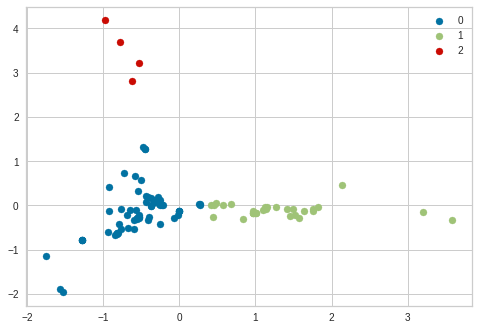

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
#mendapatkan label unik
label = prediksi
u_labels = np.unique(label)
print(u_labels)
 
#menampilkan hasil dalam bentuk grafik:
 
for i in u_labels:
    plt.scatter(df_fcluster[label == i , 0] , df_fcluster[label == i , 1] , label = i)
plt.legend()
plt.show()

# **Tugas peringkasan dokumen dari berita online ( link berita bebas) menggunakan metode pagerank**

Meringkas merupakan proses untuk mempersingkat suatu dokumen atau teks dengan cara mengambil beberapa bagian penting saja yang berada pada teks, sehingga teks tersebut dapat dengan mudah dan lebih cepat untuk dipahami.

Pada kesempatan kali ini, disini kita akan mencoba untuk meringkas suatu artikel pada laman media berita terkemuka, yaitu kompas.com 

**Metode**

Untuk pengaplikasiannya, disini kita akan mencoba menerapkan metode atau algoritma pagerank.

PageRank (PR) adalah algoritma yang digunakan oleh Google Search untuk menentukan peringkat situs web dalam hasil mesin pencari mereka. 

**PageRank** bekerja dengan menghitung jumlah dan kualitas tautan ke halaman untuk menentukan perkiraan kasar tentang seberapa penting situs web itu. Asumsi yang mendasarinya adalah bahwa situs web yang lebih penting cenderung menerima lebih banyak tautan dari situs web lain.

Namun karena disini kita akan menerapkannya untuk meranking kalimat (bukan halaman), maka disini kita akan meyebut algoritma tersebut sebagai **textrank**.

Berikut adalah tahapan yang akan kita lakukan dalam penerapan algoritma **textrank** untuk meranking kalimat.

![tahapan meringkas](https://cdn.analyticsvidhya.com/wp-content/uploads/2018/10/block_3.png)

[sumber foto](https://www.analyticsvidhya.com/blog/2018/11/introduction-text-summarization-textrank-python/)

## **Instalasi Library**
Pada tahap ini dilakukan instalasi library-library yang nantinya dibutuhkan untuk menjalankan program, berikut adalah library yang dibutuhkan : 

---



> ###  [Scrapy](https://scrapy.org/)
Scrapy merupakan kerangka kerja / framework sumber terbuka (open source) yang ditulis dengan bahasa pemrograman python dan berguna untuk melakukan ekstraksi data dari suatu web. Pada program ini kita akan menggunakan scrapy untuk mengambil/mengekstrak data abstrak dari website Portal Tugas Akhir Universitas Trunojoyo Madura.

> ### [Pandas](https://pandas.pydata.org/)
Pandas merupakan perpustakaan / library sumber terbuka (Open Source) yang ditulis dengan bahasa pemrograman python dan berguna untuk melakukan analisis dan manipulasi data, khususnya untuk memanipulasi tabel numerik dan deret waktu.
Pada program ini kita akan memanfaatkan Pandas DataFrame untuk menempatkan data hasil crawling.

> ### [Scikit-learn](https://scikit-learn.org/stable/index.html)
Scikit-learn adalah library machine learning open source  untuk bahasa pemrograman Python. Ini fitur berbagai klasifikasi, regresi, algoritma pengelompokan, dan alat yang efisien untuk data mining dan analisis data. Ini dibangun di atas NumPy, SciPy, dan Matplotlib.

> ### [Natural Language Toolkit](https://www.nltk.org/index.html) (NTLK)
NLTK adalah platform terkemuka untuk membangun program Python untuk bekerja dengan data bahasa manusia. Ini menyediakan antarmuka yang mudah digunakan ke lebih dari 50 sumber daya korpora dan leksikal seperti WordNet, bersama dengan rangkaian perpustakaan pemrosesan teks untuk klasifikasi, tokenisasi, stemming, penandaan, penguraian, dan penalaran semantik, pembungkus untuk perpustakaan NLP kekuatan industri, dan forum diskusi yang aktif . [Sumber](https://www.nltk.org/index.html)


> ### [SciPy](https://docs.scipy.org/doc/scipy/tutorial/general.html) (NTLK)
SciPy adalah kumpulan algoritma matematika dan fungsi kenyamanan yang dibangun di atas ekstensi NumPy dari Python. Ini menambahkan kekuatan yang signifikan ke sesi Python interaktif dengan menyediakan pengguna dengan perintah dan kelas tingkat tinggi untuk memanipulasi dan memvisualisasikan data. [Sumber](https://docs.scipy.org/doc/scipy/tutorial/general.html)

In [ ]:
%%capture
!pip install scrapy
!pip install pandas
!pip install scikit-learn
!pip install --user -U nltk

!pip install scipy
!pip install networkx


## **Menghapus File lama**
Karena disini kita akan menulis script dan mengekspor hasil ekstrak data ke sebuah berkas, maka untuk menghindari terjadinya duplikasi konten pada berkas tersebut, kita akan melakukan penghapusan berkas tersebut terlebih dahulu (jika berkas terebut ada)

In [ ]:
!rm -rf kompas_scrape.py hasil.json && sleep 1

## **Menulis Script Konfigurasi Scrapy**
Pada tahap ini akan dibuat script kofigurasi scrapy, script ini sendiri berupa class yang berisi fungsi untuk melakukan crawling dan scraping data artikel yang berada pada website kompas.com.<p>
Berikut adalah penjelasan singkat mengenai script tersebut.

---
<br>

```
 start_urls = [
      artikel_url
      ]
```

Variable tersebut merupakan variable yang berisi url artikel yang nantinya akan di crawl oleh scrapy. Sebagai informasi, value yang berada pada variable tersebut merupakan url halaman artikel dari website kompas.com.

---


```
def parse(self, response):
        a = ""
        for paragraf in response.xpath('//div[contains(@class,"clearfix")]/p/text()').getall():
          a = a+" "+str(paragraf)
        item = {
            'judul' : response.xpath('//h1[contains(@class,"read__title")]/text()').get(),
            'konten' : a
        }

        yield item
```

Fungsi ini merupakan fungsi parsing konten yang berguna untuk melakukan parsing/penguraian dari dari url inputan guna untuk mendapatkan konten berupa teks (judul dan konten artikel) dari suatu halaman artikel website kompas.com.





In [ ]:
%%writefile -a kompas_scrape.py
import string
import scrapy
from scrapy import Request

#@markdown ---
#@markdown ### Masukkan url artikel kompas.com :
artikel_url = "https://tekno.kompas.com/read/2022/10/06/16090047/gandeng-nicholas-saputra-di-film-terbarunya-riri-riza-beberkan-pengalaman-bikin" #@param {type:"string"}
artikel_url = artikel_url+"?page=all"
#@markdown ---

class ptaUTM(scrapy.Spider):
    name = "Kompas"
    start_urls = [
      artikel_url
      ]


    def parse(self, response):
        a = ""
        for paragraf in response.xpath('//div[contains(@class,"clearfix")]/p/text()').getall():
          a = a+" "+str(paragraf)
        item = {
            'judul' : response.xpath('//h1[contains(@class,"read__title")]/text()').get(),
            'konten' : a
        }

        yield item

Writing kompas_scrape.py


## **Menjalankan Script Scrapy**
Setelah sebelumnya kita menulis script konfigurasi scrapy, selanjutnya kita akan menjalankan script tersebut dengan perintah "scrapy runspider" yang diikuti dengan nama berkas script dan dan nama berkas output untuk menyimpan hasilnya.

In [ ]:
%%capture
!scrapy runspider kompas_scrape.py -O hasil.json && sleep 2

## **Import Hasil**
Setelah perintah sebelumnya berhasil dijalankan, selanjutnya kita akan melakukan import isi berkas hasil scrape sebelumnya kedalam Pandas DataFrame.

In [ ]:
import pandas as pd
pd.options.mode.chained_assignment = None
pd.options.display.max_colwidth = None
pd.options.display.max_columns = None
pd.options.display.max_rows = None
df_scrape = pd.read_json('hasil.json')
df_scrape

judul  \
0  Gandeng Nicholas Saputra di Film Terbarunya, Riri Riza Beberkan Pengalaman Bikin Film Pakai Oppo Find X5 Pro 5G   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

Preprocessing

## **Preprocessing**



### Split text/dokumen menjadi kalimat
Karena untuk meringkas text/dokumen disini kita akan membandingkan tiap kalimat, maka tiap kalimat yang ada pada dokumen akan pemisahan per kalimat.

In [ ]:
import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize

df_pisahkalimat = df_scrape.copy()
df_pisahkalimat ["konten"][0] = sent_tokenize(df_pisahkalimat["konten"][0])

df_pisahkalimat = pd.DataFrame(df_pisahkalimat["konten"][0], columns=["kalimat"])
df_pisahkalimat

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


,kalimat
0,"– Sineas serta produser kenamaan Indonesia, Riri Riza dan Mira Lesmana, meluncurkan terbaru berjudul pada Kamis (6/10/2022)."
1,Kedua sineas yang tergabung dalam Miles Film itu menggandeng Nicholas Saputra sebagai aktor utama di film yang berdurasi 30 menit tersebut.
2,"Untuk diketahui, kerja sama Nicholas, Riri, dan Mira sudah terjalin sejak lama."
3,"Nicholas telah terlibat dalam sejumlah film yang digarap Riri sebagai sutradara dan diproduseri Mira, yakni (2004), (2005), (2008), dan (2016)."
4,Film-film tersebut mendapat sambutan positif dari penikmat film Tanah Air.
5,", misalnya, berhasil ditonton 3,6 juta orang dalam kurun waktu satu bulan sejak diluncurkan pertama kali pada Kamis (28/4/2016)."
6,Film ini merajai Indonesia saat itu.
7,"Tentang film terbarunya, Riri mengatakan, mengisahkan tentang seorang penulis bernama Rhun (diperankan Nicholas) yang jatuh cinta dengan salah satu pembaca novel buatannya."
8,Keterpikatan Rhun terhadap orang tersebut membawanya dalam misteri tak terduga.
9,"Selain dari jalan cerita, beber Riri, film pendek tersebut punya keunikan lain, yakni direkam secara keseluruhan menggunakan , yakni ."


### Case Folding
Case folding merupakan tahap text preprocessing yang berguna untuk :


*   Mengubah huruf kapital menjadi huruf kecil
*   Mengapus tanda baca
*   Menghapus angka
*   Menghapus karakter kosong




In [ ]:
import string
df_casefolding = df_pisahkalimat.copy()
#mengubah menjadi huruf kecil
df_casefolding['kalimat'] = df_casefolding['kalimat'].str.lower()

#menghapus tanda baca
tanda_baca = string.punctuation
tanda_baca = tanda_baca+"–"
for char in tanda_baca:
    df_casefolding['kalimat'] = df_casefolding['kalimat'].replace(r'[\%s]'%char," ", regex=True)

#menghapus angka
df_casefolding['kalimat'] = df_casefolding['kalimat'].replace(r'\d+',' ', regex=True)

#menghapus karakter kosong
df_casefolding['kalimat'] = df_casefolding['kalimat'].replace(r'\s+',' ', regex=True)
df_casefolding.head(2)

,kalimat
0,sineas serta produser kenamaan indonesia riri riza dan mira lesmana meluncurkan terbaru berjudul pada kamis
1,kedua sineas yang tergabung dalam miles film itu menggandeng nicholas saputra sebagai aktor utama di film yang berdurasi menit tersebut


### Stopwords Removal
StopWords Removal merupakan tahap prepocessing yang berguna untuk menhapus kata umum yang biasanya muncul dalam jumlah besar dan dianggap tidak memiliki makna. Contoh stopword dalam bahasa Indonesia adalah “yang”, “dan”, “di”, “dari”, dll.


In [ ]:
import urllib.request, json
df_stopwords = df_casefolding.copy() 
with urllib.request.urlopen("https://raw.githubusercontent.com/smilesense/stopwords-id/master/stopwords-id.json") as list_stopwords:
    data_stopword = json.load(list_stopwords)

for i in data_stopword:
    df_stopwords['kalimat'] = df_stopwords['kalimat'].replace(r'\b%s\b'%i, '', regex=True)
df_stopwords['kalimat'] = df_stopwords['kalimat'].replace(r'\s+',' ', regex=True)

df_stopwords.head(2)

,kalimat
0,sineas produser kenamaan indonesia riri riza mira lesmana meluncurkan terbaru berjudul kamis
1,sineas tergabung miles film menggandeng nicholas saputra aktor utama film berdurasi menit


### Vectorization

Dalam Machine Learning, vektorisasi adalah langkah dalam ekstraksi fitur. Idenya adalah untuk mendapatkan beberapa fitur berbeda dari teks untuk model untuk dilatih, dengan mengubah teks menjadi vektor numerik.



In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
cv_matrix = cv.fit_transform(df_casefolding['kalimat'])

In [ ]:
print ("Banyaknya kosa kata = ", len((cv.get_feature_names_out())))

Banyaknya kosa kata =  325


In [ ]:
print ("kosa kata = ", (cv.get_feature_names_out()))

kosa kata =  ['agar' 'ainr' 'air' 'akan' 'aktor' 'akurasi' 'angkat' 'ataupun' 'bagian'
 'baik' 'bangga' 'banyak' 'batas' 'beber' 'bentuk' 'beragam' 'berbagai'
 'berbahan' 'bercerita' 'berdiskusi' 'berdurasi' 'beresolusi' 'berharap'
 'berhasil' 'berjudul' 'berkat' 'berkolaborasi' 'berkualitas' 'bernama'
 'bisa' 'buatannya' 'bujet' 'bulan' 'cahaya' 'camera' 'cerita' 'ch'
 'chief' 'cinta' 'citra' 'com' 'cukup' 'dalam' 'dan' 'dapat' 'dapatkan'
 'dari' 'demikian' 'dengan' 'depan' 'detail' 'di' 'diangkat' 'didesain'
 'didukung' 'digarap' 'dihadirkan' 'dihasilkan' 'dikembangkan' 'diketahui'
 'dilakukan' 'diluncurkan' 'dimaksimalkan' 'dinamis' 'diperankan'
 'diproduseri' 'dirancang' 'direkam' 'dirinya' 'disaksikan' 'ditambah'
 'ditonton' 'dnr' 'dual' 'dukungan' 'emosi' 'film' 'find' 'flagship'
 'gambar' 'gambarnya' 'gelap' 'genre' 'gerakan' 'hal' 'harus' 'hasil'
 'hasilnya' 'hingga' 'ia' 'ide' 'ikut' 'imx' 'indonesia' 'industri'
 'informasi' 'ini' 'inovasi' 'insight' 'itu' 'jalan' 'jatuh' 'jug

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
normal_matrix = TfidfTransformer().fit_transform(cv_matrix)
print(normal_matrix.toarray())
print(normal_matrix.T.toarray)

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.25561578 0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.33740317]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]
<bound method _cs_matrix.toarray of <325x44 sparse matrix of type '<class 'numpy.float64'>'
	with 596 stored elements in Compressed Sparse Column format>>


### Cosine Similarity

Cosinus Similarity ukuran kemiripan antara dua vektor bukan nol dari ruang hasil kali dalam. Pengukuran kesamaan ini terutama berkaitan dengan orientasi, bukan besarnya. Singkatnya, dua vektor kosinus yang sejajar dalam orientasi yang sama akan memiliki pengukuran kesamaan 1, sedangkan dua vektor yang sejajar tegak lurus akan memiliki kesamaan 0. 


---


Pengukuran Cosinus Similarity dimulai dengan mencari cosinus dari dua vektor bukan nol. Ini dapat diturunkan menggunakan rumus produk titik Euclidean yang ditulis sebagai:

${\displaystyle \mathbf {A} \cdot \mathbf {B} =\left\|\mathbf {A} \right\|\left\|\mathbf {B} \right\|\cos \theta }$


---


Kemudian, mengingat dua vektor dan produk titik, kesamaan kosinus didefinisikan sebagai:

${\displaystyle {\text{cosine similarity}}=S_{C}(A,B)={\mathbf {A} \cdot \mathbf {B}  \over \|\mathbf {A} \|\|\mathbf {B} \|}={\frac {\sum \limits _{i=1}^{n}{A_{i}B_{i}}}{{\sqrt {\sum \limits _{i=1}^{n}{A_{i}^{2}}}}{\sqrt {\sum \limits _{i=1}^{n}{B_{i}^{2}}}}}},}$


---



In [ ]:
import numpy as np
vektorkalimat=normal_matrix.toarray()
A=vektorkalimat[0]
B=vektorkalimat[1]
dot = np.dot(A, B)
norma = np.linalg.norm(A)
normb = np.linalg.norm(A)
cos = dot / (norma * normb)
cos

0.05455090845645886

## Membangun Graph

Graph merupakan sekumpulan objek terstruktur di mana beberapa pasangan objek mempunyai hubungan ataupun keterkaitan tertentu. Graph disini digunakan untuk melihat seberapa banyak hubungan antara kalimat satu dengan lainnya.

In [ ]:
res_graph = normal_matrix * normal_matrix.T
print(res_graph)

  (0, 43)	0.037964866367060646
  (0, 40)	0.02830652734103744
  (0, 34)	0.02458680775193757
  (0, 33)	0.03021820466347394
  (0, 6)	0.09290535458379356
  (0, 41)	0.12945659798845793
  (0, 24)	0.04026122899565502
  (0, 35)	0.05737839681730318
  (0, 32)	0.053641878916212346
  (0, 31)	0.034952886076106006
  (0, 22)	0.07307406369813813
  (0, 19)	0.038469326035436804
  (0, 5)	0.08696919119164015
  (0, 23)	0.021285574992012214
  (0, 17)	0.04993068364432622
  (0, 16)	0.030399597561910588
  (0, 12)	0.07213543259870259
  (0, 10)	0.03595262469287051
  (0, 9)	0.02420172986029702
  (0, 7)	0.021729846834167503
  (0, 3)	0.13914258847920313
  (0, 2)	0.11906127768628352
  (0, 29)	0.1468478003874537
  (0, 28)	0.10061464753630059
  (0, 1)	0.05455090845645886
  :	:
  (42, 9)	0.03747150239037005
  (42, 7)	0.033644289573063174
  (42, 6)	0.07585465719190945
  (42, 4)	0.14882619103994477
  (42, 3)	0.04452102920762233
  (42, 1)	0.07783484618118466
  (42, 41)	0.22330422950350953
  (42, 42)	1.0
  (42, 32)	0.06779

In [ ]:
import networkx as nx
nx_graph = nx.from_scipy_sparse_matrix(res_graph)

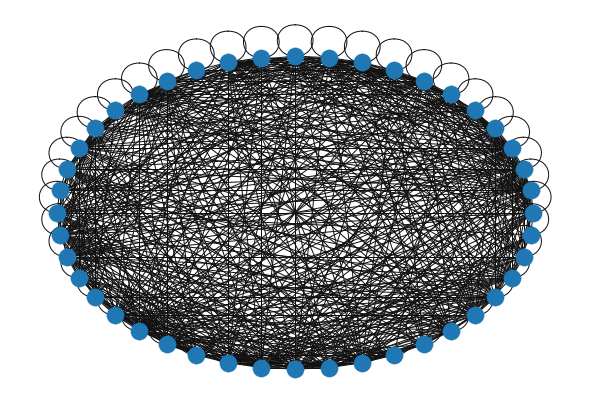

In [ ]:
nx.draw_circular(nx_graph)

## Pagerank

PageRank adalah algoritma analisis tautan dan memberikan bobot numerik untuk setiap elemen dari kumpulan dokumen yang ditautkan. 

Perhitungan PageRank memerlukan beberapa lintasan, yang disebut "iterasi", melalui koleksi untuk menyesuaikan perkiraan nilai PageRank agar lebih mencerminkan nilai teoretis yang sebenarnya.

In [ ]:
scores = nx.pagerank(nx_graph, alpha=0.88, max_iter=1000, )
scores

{0: 0.021323521822952954,
 1: 0.029729676476452773,
 2: 0.021483926982576177,
 3: 0.029758293822894202,
 4: 0.023026717057358148,
 5: 0.01674010810369875,
 6: 0.022636802379479327,
 7: 0.02235692394177619,
 8: 0.019195640887955456,
 9: 0.022339136666461906,
 10: 0.022612205181235343,
 11: 0.026528306916227335,
 12: 0.020765969590432802,
 13: 0.026329026336391115,
 14: 0.016425222974096723,
 15: 0.0258734463440964,
 16: 0.030714720689486157,
 17: 0.018317370757734357,
 18: 0.02027486377763572,
 19: 0.02781344604865658,
 20: 0.020636875117445032,
 21: 0.01824973153731066,
 22: 0.02341057079408491,
 23: 0.027107278054450533,
 24: 0.023312141079714976,
 25: 0.020916046956934338,
 26: 0.017275003659799774,
 27: 0.029260026905173327,
 28: 0.026223911444879327,
 29: 0.021235489618426036,
 30: 0.020567293683220925,
 31: 0.026136113344508417,
 32: 0.027658399715160185,
 33: 0.021752196145777464,
 34: 0.021744892455222636,
 35: 0.02359796726647058,
 36: 0.01704767602894283,
 37: 0.01653240779400

In [ ]:
#@title Persentase Ringkasan
#@markdown ---
#@markdown ### Tentukan persentase ringkasan : total kalimat:
persentase_ringkasan = 50 #@param {type:"slider", min:50, max:90, step:10}
#@markdown ---


Mencocokkan indeks kalimat asli dan kalimat hasil preprocessing

In [ ]:
top_sentence={sentence:scores[index] for index,sentence in enumerate(df_pisahkalimat["kalimat"].values)}

persentase = len(df_pisahkalimat["kalimat"])*persentase_ringkasan//100
print("Jumlah Kalimat pada Ringkasan : ",persentase)
top=dict(sorted(top_sentence.items(), key=lambda x: x[1], reverse=True)[:persentase])

Jumlah Kalimat pada Ringkasan :  22


### Hasil dan perbandingan

In [ ]:
ringkasan = ""
for sent in df_pisahkalimat["kalimat"].values:
    if sent in top.keys():
        ringkasan = ringkasan+" "+sent

#ringkasan
perbandingan = {'Teks asli' : df_scrape["konten"], 'Hasil Ringkasan' : [ringkasan]}
df_perbandingan = pd.DataFrame(perbandingan)
df_perbandingan

Teks asli  \
0    – Sineas serta produser kenamaan Indonesia, Riri Riza dan Mira Lesmana, meluncurkan   terbaru berjudul   pada Kamis (6/10/2022). Kedua sineas yang tergabung dalam Miles Film itu menggandeng Nicholas Saputra sebagai aktor utama di film yang berdurasi 30 menit tersebut. Untuk diketahui, kerja sama Nicholas, Riri, dan Mira sudah terjalin sejak lama. Nicholas telah terlibat dalam sejumlah film yang digarap Riri sebagai sutradara dan diproduseri Mira, yakni   (2004),   (2005),   (2008), dan   (2016). Film-film tersebut mendapat sambutan positif dari penikmat film Tanah Air.  , misalnya, berhasil ditonton 3,6 juta orang dalam kurun waktu satu bulan sejak diluncurkan pertama kali pada Kamis (28/4/2016). Film ini merajai     Indonesia saat itu. Tentang film terbarunya, Riri mengatakan,   mengisahkan tentang seorang penulis bernama Rhun (diperankan Nicholas) yang jatuh cinta dengan salah satu pembaca novel buatannya. Keterpikatan Rhun terhadap orang tersebut membawanya dalam misteri tak terduga. Selain dari jalan cerita, beber Riri, film pendek tersebut punya keunikan lain, yakni direkam secara keseluruhan menggunakan  , yakni  . Riri bercerita,   merupakan film keduanya yang direkam keseluruhan menggunakan smartphone. Sebelumnya, ia pernah membuat film pendek   yang direkam menggunakan   Find X3 Pro. Pada proses syuting, kisah Riri,   memungkinkan dirinya mengeksplorasi berbagai teknik pengambilan gambar. Pasalnya, genre romansa misteri yang diangkat dalam film mengharuskan pengambilan gambar yang minim cahaya untuk menggambarkan suasana. “Tone warna gelap kerap menjadi kendala dalam menampilkan emosi pemain. Akan tetapi, kendala tersebut dapat teratasi dengan kecanggihan Oppo Find X5 Pro 5G. Ini memungkinkan saya mendapatkan hasil gambar yang memberikan sentuhan emosi dalam film ini,” ujar Riri. Nicholas pun mengamini pengakuan Riri. Ia mengakui, proses syuting cukup menantang karena dilakukan dalam kondisi minim cahaya. Akan tetapi, hal tersebut dapat teratasi berkat inovasi teknologi yang dihadirkan pada Oppo Find X5 Pro 5G. “Setelah melihat hasilnya, saya kagum karena hasil gambarnya setara dengan kamera profesional,” ujar Nicholas. Terkait peran sebagai Rhun, Nicholas mengaku cukup tertantang. Ia harus bisa membangun karakter Rhun dan suasana misteri pada set yang sederhana. Oleh karena itu, selama proses syuting, ia banyak berdiskusi dengan Riri terkait pendalaman karakter agar bisa membawakan karakter Rhun di depan kamera dengan sempurna. Dari sisi produksi, Mira ikut angkat suara tentang keterlibatan Oppo yang membebaskan tim produksi film untuk merancang ide cerita. Menurutnya, hal ini membuat proses produksi menjadi menyenangkan. Tim pun tidak terbebani oleh kru ataupun bujet karena sepenuhnya didukung oleh Oppo. “Ditambah lagi, kemajuan teknologi saat ini yang tecermin lewat Oppo Find X5 Pro 5G memungkinkan siapa saja dapat membuat film dengan  . Hal ini juga memudahkan para sineas muda dalam pengambilan gambar untuk karya-karya film mereka,” ujar Mira. Chief Marketing Officer Oppo Indonesia Patrick Owen mengatakan, pihaknya sangat bangga bisa berkolaborasi dengan Riri Riza. Kolaborasi ini dilakukan pihaknya sebagai bentuk dukungan Oppo terhadap industri kreatif di Tanah Air, termasuk industri perfilman. Patrick mengatakan, teknologi yang tersemat pada   memang didesain untuk dapat mendukung proses produksi industri kreatif, termasuk sinematik. Pasalnya, Oppo Find X5 Pro 5G sebagai     didukung oleh ch  (NPU) Marisilicon X. Teknologi ini dirancang dan dikembangkan Oppo khusus untuk menghasilkan citra terbaik pada gambar. “  tersebut juga memiliki Ultra Night Video berkualitas 4K yang dimaksimalkan dengan   (AINR) dan 3D Noise Reduction (3DNR). Kombinasi ini mampu memaksimalkan detail dan rentang dinamis video sehingga gambar dihasilkan mampu merepresentasikan gerakan dengan lebih baik,” ujar Patrick. Senjata utama   dalam proses sinematik, sambungnya, terletak pada dual flagship camera yang meliputi kamera